<a href="https://colab.research.google.com/github/NirmaliePerera/Machine-Learning-Project-1-GBM/blob/main/GBM_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Titanic Survival Using Gradient Boosting**
---
This project is used for explaining how The Gradient Boosting Machine is used. Apart from GBM, to explain how well it predicts survivors vs. non-survivors, calculations like confusion metrix, precision, recall, and F1-score is used and explained.

## 1. Importing Necessary Libraries

In [6]:
# importing libraries
import pandas as pd       # For data handling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## 2. Load the Titanic Dataset
Dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


In [7]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

## 3. View first few rows of the dataset

In [8]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 4. Drop unnecessary columns
(The features that do not help with prediction)

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# "axis" controls whether you're working with rows or columns (axis=0 -> rows, axis=1 -> columns)
# "inplace" whether the changes are applied to the original DataFrame or if a new DataFrame is returned. (True -> modify the existing df, False(default) -> returns a new df without changing the original)

## 5. Handle missing values

In [10]:
# Fill missing 'Age' with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# fillna -> fill the missing values(NaNs)

# Fill missing 'Embarked' with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## 6. Encode categorical features (Sex and Embarked)

In [11]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])         # Male=0, Female=1 (depends on mapping(how they appear on data))
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # C=0, Q=1, S=2 (depends on mapping(how they appear on data))

## 7. Separate features and target

In [12]:
X = df.drop('Survived', axis=1)   # Features
y = df['Survived']                # Target (0 = Died, 1 = Survived)

## 8. Split the dataset into training and test sets (80/20)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size = 0.2 -> 20% of data is for testing, the rest 80% is for training.
# random_state=42 -> sets the random seed so that the split is the same every time you run the code

## 9. Initialize the Gradient Boosting Classifier

In [14]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

## 10. Train the model

In [15]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## 11. Make predictions
(Using the model)

In [16]:
y_pred = gbm.predict(X_test)

## 12. Evaluate accuracy

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

Gradient Boosting Model Accuracy: 0.8100558659217877


## Accuracy of the Model
Here, the Gradient Boosting Machine classifier correctly predicted whether passengers survived or not **about 81% of the time** on the test data. In simpler terms, **out of 100 passengers, the model gets about 81 right**.

## Is 81% a Solid Result (especially for Titanic) ?
The Titanic dataset is not huge and has noisy and incomplete data. Therefore, achieving 80%+ accuracy without heavy tuning can be said as pretty good.
Furthermore, GBM performs well because,  

*   It builds trees sequentially, learning from previous mistakes.
*   It’s good at capturing non-linear patterns.

## Can be interpreted further by:


*  **Comparing to baseline:** If it always predicted "not survived" (the majority class), it would generate around 62% accuracy. Therefore, 81% is a huge improvement.
*   **Evaluate with other metrics:** Accuracy is great, but sometimes it hides class imbalance. We can consider adding: confusion matrix, precision, recall, or F1-score, especially if we want to explain how well it *predicts survivors vs. non-survivors*.



## 13. Adding a Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## 14. Print Confussion Metrix

In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[93 12]
 [22 52]]


## 15. Plot the Confusion Matrix Using Seaborn

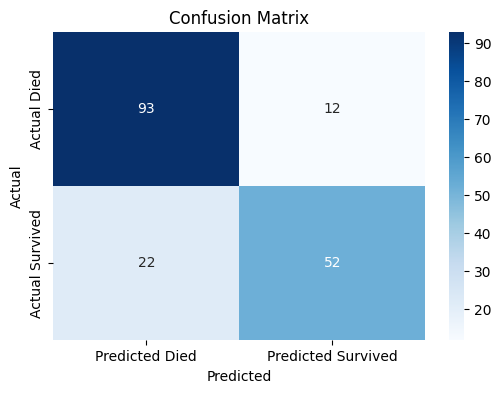

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Died', 'Predicted Survived'],
            yticklabels=['Actual Died', 'Actual Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## According to the Confusion Matrix:


*   93 people who died were correctly predicted as died, which are **True Negatives** (TN)
*   12 people who died were incorrectly predicted as survived, which are **False Positives** (FP)
*   22 people who survived were incorrectly predicted as died, which are **False Negatives** (FN)
*   52 people who survived were correctly predicted as survived, which are **True Positives** (TP)

(Negatives (0) indicates died , Positives (1) indicate survived, If the prediction is correct it is true, otherwise, false. )


## 16. Classification Report

In [21]:
print(classification_report(y_test, y_pred, target_names=["Died", "Servived"]))

              precision    recall  f1-score   support

        Died       0.81      0.89      0.85       105
    Servived       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Precision For "Servived":
   
```
TP/(TP+FP)
= 52/(52+12)
= 52/64
≈ 0.8125
```
Out of all the people, the model said as "servived", **81% actually survived**.

## Recall for "Servived":
```
TP/(TP+FN)
= 52(52+22)
= 52/74
≈ 0.7027
```
Out of all actual survivors, the model found **70% of them**.
## F1-Score


```
F1 = 2 * (Precision*Recall)/(Precision + Recall)
= 2 * (0.8125 * 0.7027) / (0.8125 + 0.7027)
≈ 2 * (0.5709) / 1.5152
≈ 1.1418 / 1.5152
≈ 0.753
```
**F-Score is the harmonic mean of precision and recall.**







##17.  Summary
**Overall accuracy is 81%,** while **precision and recall** are respectively **81% and 70%**, meaning that model is **better at identifying those who didn't survive**.
This suggests that an **improvement in recall might be needed** to catch more "true survivors"

---
Prepared by : D N S D Perera

Date : 10.05.2025

3rd Year

BSc(Honors) in Information Technology

2nd batch
